<div align="left">
<h4><a href="index.ipynb">RETURN TO INDEX</a></h4>
</div>
<div align="center">
<h1><a href="index.ipynb">DH3501: Advanced Social Networks</a><br/><br/><em>Class 15</em>: Graph Data Modeling and the Cypher Query Language </h1>
</div>

<div style="float:left">
<b>Western University</b><br/>
<b>Department of Modern Languages and Literatures</b><br/>
<b>Digital Humanities – DH 3501</b><br/>
<br/>
<b>Instructor</b>: David Brown<br/>
<b>E-mail</b>: <a href="mailto:dbrow52@uwo.ca">dbrow52@uwo.ca</a><br/>
<b>Office</b>: AHB 1R14<br/>
</div>
<div style="float:left">
<img style="width:200px; margin-left:100px" src="http://www.bsr.org/images/blog/networks.jpg" />
</div>

To begin, let's talk about the modeling the "email provenance modeling domain" discussed in chapter 3 of RWE.

What was the lesson taught here? 

What did then mean when they described the first model as lossy?

What was the final data model presented in the book? 

## Neo4j example

Today we are gonna skip the formalities and jump straight into using Neo4j.

Let's get started. **Fire up a terminal!** Then [download](http://info.neo4j.com/download-thanks.html?edition=community&flavour=unix&_ga=1.46919143.1349710317.1417922000), unpack, and start the neo4j server.

```bash
$ tar -xzvf neo4j-community-2.1.7-unix.tar.gz
$ mv neo4j-community-2.1.7 neo4j
$ cd neo4j
$ ./bin/neo4j console
```
Neo4j, like a relational database, provides a DSL that allows the users to execute queries against the data contained in the database. Neo4j provides an elegant, declarative language call Cypher. Cypher has its own syntax and semantics, but you can see how it is (in some ways) based on SQL.

For this class, we will be using the ipython-cypher package to execute Neo4j Cypher queries from the IPython environment. We'll also see how to use a Python client to connect to the database and execute Cypher.

In [6]:
# This sets up the "cell magic" used by ipython-cypher
%load_ext cypher
%matplotlib inline
import networkx as nx

The cypher extension is already loaded. To reload it, use:
  %reload_ext cypher


**NOTE** The following example, while taken from the book, is modified to use Neo4j labels.

Let's go throught the following Cypher CREATE statements, and then look at the domain(s) they are modeling.

In [3]:
%%cypher

CREATE
 (shakespeare:Person {firstname: 'William', lastname: 'Shakespeare'}),

 (juliusCaesar:Play {title: 'Julius Caesar'}),

 (shakespeare)-[:WROTE_PLAY {year: 1599}]->(juliusCaesar),

 (theTempest:Play { title: 'The Tempest' }),

 (shakespeare)-[:WROTE_PLAY { year: 1610}]->(theTempest),

 (rsc:Company {name: 'RSC'}),

 (production1:Production {name: 'Julius Caesar'}),

 (rsc)-[:PRODUCED]->(production1),

 (production1)-[:PRODUCTION_OF]->(juliusCaesar),

 (performance1:Date {date: 20120729}),

 (performance1)-[:PERFORMANCE_OF]->(production1),

 (production2:Production {name: 'The Tempest'}),

 (rsc)-[:PRODUCED]->(production2),

 (production2)-[:PRODUCTION_OF]->(theTempest),

 (performance2:Performance {date: 20061121}),

 (performance2)-[:PERFORMANCE_OF]->(production2),

 (performance3:Performance {date: 20120730}),

 (performance3)-[:PERFORMANCE_OF]->(production1),

 (billy:Person {name: 'Billy'}),

 (review:Review {rating: 5, review: 'This was awesome!'}),

 (billy)-[:WROTE_REVIEW]->(review),

 (review)-[:RATED]->(performance1),

 (theatreRoyal:Theatre {name: 'Theatre Royal'}),

 (performance1)-[:VENUE]->(theatreRoyal),

 (performance2)-[:VENUE]->(theatreRoyal),

 (performance3)-[:VENUE]->(theatreRoyal),

 (greyStreet:Street {name: 'Grey Street'}),

 (theatreRoyal)-[:STREET]->(greyStreet),

 (newcastle:City {name: 'Newcastle'}),

 (greyStreet)-[:CITY]->(newcastle),

 (tyneAndWear:County {name: 'Tyne and Wear'}),

 (newcastle)-[:COUNTY]->(tyneAndWear),

 (england:Country {name: 'England'}),

 (tyneAndWear)-[:COUNTRY]->(england),

 (stratford:City {name: 'Stratford upon Avon'}),

 (stratford)-[:COUNTRY]->(england),

 (rsc)-[:BASED_IN]->(stratford),

 (shakespeare)-[:BORN_IN]->stratford

17 labels added.
17 nodes created.
21 properties set.
21 relationships created.


[]

<img style="float:left; width: 500px" src="img/shakes.png">

To read data from the database, we use the `MATCH` keyword.

In [2]:
# This query returns all edges in the graph.
results = %cypher MATCH (n)-[e]-(m) RETURN n, e, m

42 rows affected.


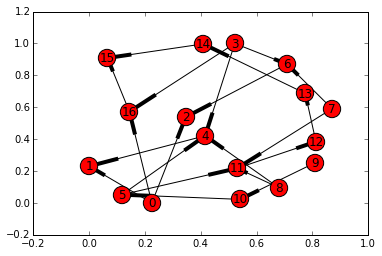

In [8]:
g = results.get_graph()
nx.draw_networkx(g)